In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [78]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

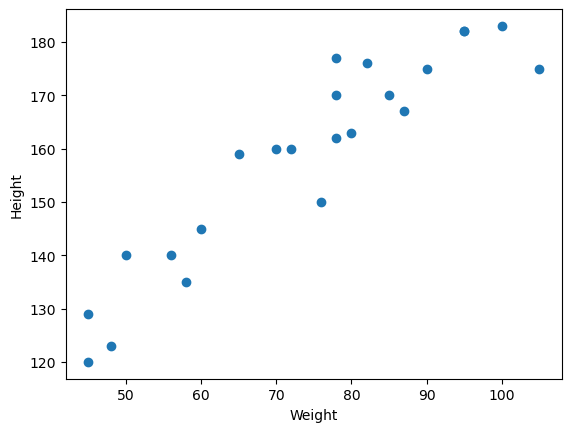

In [79]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel('Height')

In [80]:
## Divide dataset into independent and dependent

X = df[['Weight']]
y = df['Height']

In [81]:
X.shape, y.shape

((23, 1), (23,))

In [82]:
from sklearn.model_selection import train_test_split 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [84]:
#Standarized the data
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

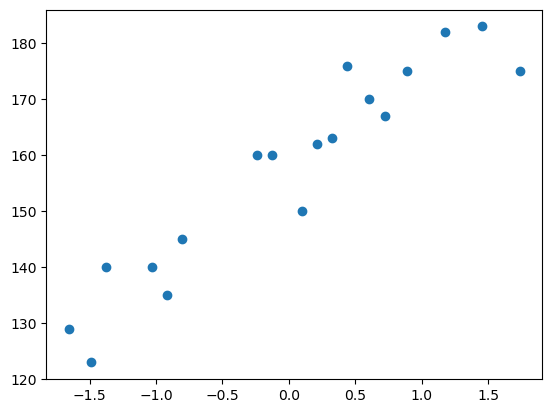

In [87]:
plt.scatter(X_train,y_train)

In [88]:
## Train the smple linear regression model
from sklearn.linear_model import LinearRegression

In [89]:
regressor = LinearRegression()

In [90]:
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
print(f"The slope is{regressor.coef_}")
print(regressor.intercept_)

The slope is[17.03440872]
157.5


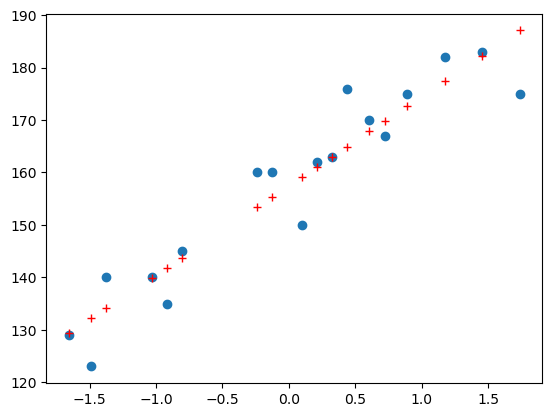

In [92]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r+')

In [93]:
y_pred_test =  regressor.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

# MSE / MAE / RMSE

# R square and adjusted R square

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [95]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(mse, mae, rmse)

109.77592599051664 9.822657814519232 10.477400726827081


# R Square

Formula

R^2 = 1 - SSR/SST

In [96]:
from sklearn.metrics import r2_score

In [97]:
score = r2_score(y_test,y_pred_test)

# Adjusted R Square

In [98]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [99]:
regressor

LinearRegression()

In [100]:
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\user\anaconda3\envs\dataScience\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [101]:
regressor.predict([scaled_weight[0]])

array([163.01076266])

In [102]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


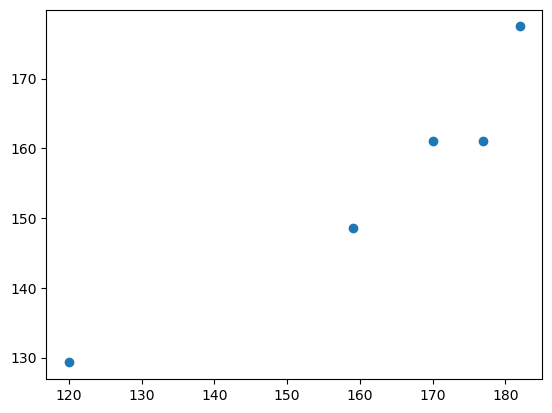

In [103]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [104]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_25880\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<AxesSubplot: xlabel='Height', ylabel='Density'>

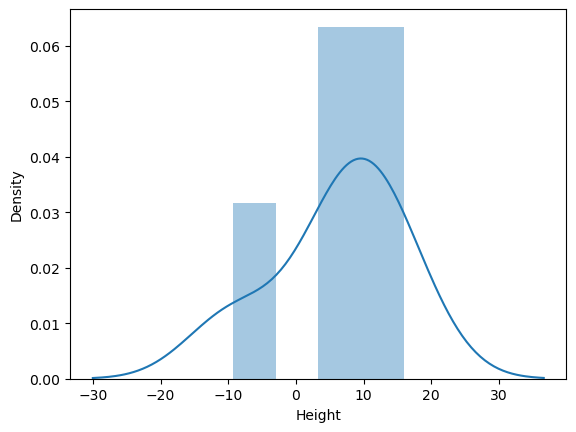

In [107]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)